Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD6: Introduction au Machine Learning, un peu de Pratique...

L'objectif de ce cours-TD est de fournir des bases pratiques à propos des algorithmes d'apprentissage supervisé de machine learning. 
Vous allez créer votre propre réseau de neuronne et faire face à certaines des problématiques usuelles en machine learning.
Pour cela nous allons utiliser la librairie Keras, basée sur TensorFlow, qui permet de créer très facilement des réseaux de neurones

In [160]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import to_categorical

# Exercice 1

Pour commencer nous allons travailler sur la base de données MNIST qui a déjà été évoquée ce matin. Il s'agit d'une base de données d'images en niveau de gris. Chaque image représente un nombre entre 0 et 9 et est composée de 28x28 pixels. MNIST comporte 60 000 images d'entrainement et 10 000 images de test.
Cette base de données est déjà incluse dans keras et a été importée lors de l'exécution de la première cellule.
Avec la ligne ci dessus vous pourrez recupérer les données d'entrainement et les données de test.

In [41]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Avant de créer votre premier réseau de neurones, il est nécessaire de bien comprendre les données et de les mettre en forme pour qu'elles puissent être utilisées par le reseau.
La cellule ci dessous affiche une des images ainsi que le format des données.  Prenez le temps de bien comprendre
le format et le type des données et des labels. Si nessaire affichez d'autres images ou allez regarder directement les matrices correspondant.

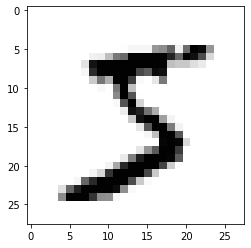

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
5


In [42]:
plt.imshow(train_images[0], cmap='Greys')
plt.show()

print(train_images.shape)
print(type(train_images))
print(train_labels.shape)
print(type(train_labels))
print(train_labels[0])

Il est possible d'afficher les images avec imshow. Elles sont encodées sous la forme d'une matrice numpy 3D (60000,28,28).
Les labels sont encodés sous la forme d'une matrice numpy 1D. Chaque label est simplement représenté sous la forme d'un chiffre.

Le réseau de neurones ne saura pas travailler avec des listes d'entiers, il faut donner en entrée des tenseurs. Les images doivent prendre la forme d'une matrice 2D de forme (60000, 28*28). De plus, actuellement, les valeurs des pixels sont encodées par des entiers compris entre 0 et 255. Il faut les transformer en flottants (float32) compris entre 0 et 1.

La cellule ci dessous permet de remettre les images sous le bon format : 
- `reshape` permet de transformer une matrice numpy pour qu'elle ait la forme désirée.
- `astype` permet de faire passer une matrice numpy d'un type à un autre. Ici on transforme les entiers en flottants.

In [43]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

Il faut également transformer les labels. Chaque label va être encodé sous la forme d'une liste de longueur 10, remplie de 0 sauf pour l'indice correspondant au label.

Ecrivez une fonction `categorie` qui prend en argument la matrice des labels et la dimension (le nombre de labels possibles) et qui renvoie une matrice numpy de format `(len(labels),dimension)` (ici `(60000,10)`). Par exemple, le label 5 sera transformé en \[0,0,0,0,0,1,0,0,0,0\]. Utilisez cette fonction pour mettre en forme les labels d'entraînement et de test.

In [44]:
def categorie(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    c= 0
    for i in labels.astype(int):
        results[c, i] = 1
        c+=1
    return results


train_labels2 = categorie(train_labels)
test_labels2 = categorie(test_labels)

In [45]:
print(train_labels2[0])
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


Il est maintenant temps de créer votre propre réseau de neurones !

Pour commencer, vous pouvez utiliser deux couches de type `Dense`. La première avec un grand nombre de neurones et sans fonction d'activation. N'oubliez pas de préciser le format des données d'entrée. La deuxième doit avoir 10 neurones, chacun correspondant à un des labels, et une fonction d'activation `softmax`.

Le reseau sera compilé avec comme optimiseur `rmsprop`, comme fonction de coût `categorical_crossentropy` et comme métrique `accuracy`.



In [46]:
reseau = models.Sequential()

reseau.add(layers.Dense(512, input_shape=(28*28,)))
reseau.add(layers.Dense(10, activation = 'softmax'))

reseau.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')

reseau.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Faites un fit sur les données d'entraînement, avec `epochs=10` et `batch_size=128`. Récupérez l'historique et tracez l'évolution de la fonction de coût et de la précision en fonction du nombre d'epochs.

In [47]:
history = reseau.fit(train_images, train_labels2, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5297 - accuracy: 0.8433
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3135 - accuracy: 0.9143
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2976 - accuracy: 0.9171
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2811 - accuracy: 0.9209
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2783 - accuracy: 0.9221
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2773 - accuracy: 0.9247
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2739 - accuracy: 0.9227
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2656 - accuracy: 0.9251
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2655 - accuracy: 0.9251
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2699 - accuracy: 0.9259

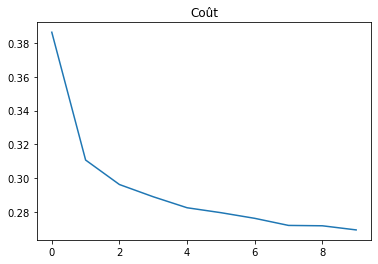

In [56]:
history_dict = history.history
loss_values = history_dict['loss']


fig = plt.figure()
plt.plot(range(10),loss_values)
plt.title('Coût')
plt.show()

Executez maintenant la case ci-dessous pour tester votre réseau. A ce stade vous devriez déjà avoir une précision supérieure à 90%.

In [55]:
test_loss, test_acc = reseau.evaluate(test_images,test_labels2)
print('Test accuracy : ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2888 - accuracy: 0.9223
Test accuracy :  0.9222999811172485


Nous allons maintenant essayer d'optimiser un peu plus ce réseau.

Séparez les données d'entrainement en deux groupes : 
- Un groupe de données d'entrainement correspondant à une grande partie des données
- Un groupe de données de validation avec le reste des données

Puis recréez un nouveau réseau et essayez de varier certains paramètres :
- Le nombre de couches
- Le nombre de neuronnes par couches
- Les fonctions d'activations *Indice : ajoutez une fonction d'activation à la première couche, vous pouvez trouver les fonctions d'activation de keras ici : https://www.tensorflow.org/api_docs/python/tf/keras/activations*
- Le nombre d'epochs
- La taille des "batch"

*Indice : pensez à tracer l'historique afin de visualiser l'apprentissage de votre réseau : `Historique = reseau.fit(...)`*

**Attention : Optimiser un réseau peut être gourmand en temps et en puissance de processeur. Soyez raisonnable et ne passez pas trop de temps à cette étape**

In [112]:
train_images3 = train_images[:40000]
train_labels3 = train_labels2[:40000]

valid_images3 = train_images[40000:]
valid_labels3 = train_labels2[40000:]

reseau2 = models.Sequential()

reseau2.add(layers.Dense(100, input_shape=(28*28,),activation = 'swish') )
reseau2.add(layers.Dropout(0.2))
reseau2.add(layers.Dense(10, activation = 'softmax'))

reseau2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')

reseau2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [120]:
history2 = reseau2.fit(train_images3, train_labels3, epochs = 50, batch_size = 1024, validation_data = (valid_images3, valid_labels3))

Epoch 1/50
40/40 [==============================] - 9s 239ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.1114 - val_accuracy: 0.9767
Epoch 2/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.1082 - val_accuracy: 0.9765
Epoch 3/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1144 - val_accuracy: 0.9766
Epoch 4/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.1189 - val_accuracy: 0.9761
Epoch 5/50
40/40 [==============================] - 1s 17ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.1124 - val_accuracy: 0.9772
Epoch 6/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.1163 - val_accuracy: 0.9772
Epoch 7/50
40/40 [==============================] - 1s 18ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.1129 - val_accuracy: 0.9776
Epoch 8/50
4

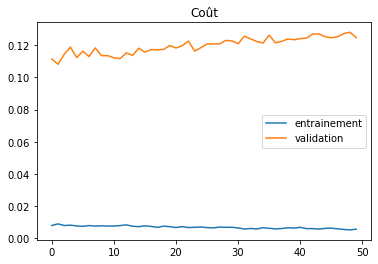

In [122]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

fig = plt.figure()
plt.plot(range(50),loss_values2, label = 'entrainement')
plt.plot(range(50),val_loss_values2, label = 'validation')
plt.title('Coût')
plt.legend()
plt.show()

In [123]:
test_loss, test_acc = reseau2.evaluate(test_images,test_labels2)
print('Test accuracy : ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9784
Test accuracy :  0.9783999919891357


Comment les différents paramètres affectent-ils le réseau?

LA REPONSE ICI (double-clique pour editer la cellule)

Essayez d'ajouter du dropout. Commentez.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

LA REPONSE ICI (double-clique pour editer la cellule)

Une fois que vous avez trouvé une configuration qui vous semble optimale, vous pouvez entraîner le réseau sur la totalité des données et le tester à nouveau. Commentez.

*Important : On ne teste le réseau sur les données de test qu'une fois que la configuration est fixée car en réglant les hyper-paramètres, on risque à nouveau l'overfitting.*

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

LA REPONSE ICI (double-clique pour editer la cellule)

# Exercice 2 : Prédiction des prix des maisons à Boston

Nous avons vu un exercice de classification : il faut trier les images dans différentes catégories. Un autre type ce problème commun en machine learning sont les problèmes de régression : à partir des valeurs d'entrée il faut prédire une valeur de sortie.

Nous allons ici essayer de prédire les prix moyens des maisons d'un certain quartier de Boston dans les années 70 étant données certaines informations sur le quartier à cette époque telles que le taux de crimes, les taxes locales etc.

Ce set de donnée présente une différence intéressante avec MNIST : il y a très peu de données. Il y a un total de 506 points répartis entre 404 points d'entraînement et 102 points de test. De plus chaque caractéristique d'un point de donnée (par exemple le taux de crime) a une échelle différente des autres. Ainsi certaines de ces valeurs sont des proportions comprises entre 0 et 1, d'autre prennent des valeurs entre 0 et 12, 0 et 100 etc.

Les données en question ont déjà été chargée au début, vous pouvez les extraire en exécutant la cellule suivante

In [88]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


Prenez le temps d'examiner un peu les données.

In [89]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

print(train_data[0])

print(train_targets)

(404, 13)
(404,)
(102, 13)
(102,)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9

Chaque donnée d'entrée contient 13 paramètres qui prennent des valeurs très différentes. Chacun de ces paramètres contient une information différente : taux de criminalité, taux de pollution, nombre de commerces etc. Si vous voulez plus d'informations sur chacun de ces paramètres, vous pouvez aller voir ce site : http://lib.stat.cmu.edu/datasets/boston.
Les valeurs cible correspondent au prix moyen des maisons en millier de dollard.

Il serait problématique de donner au réseau des données aussi différentes. Il est possible que le réseau réussisse à s'adapter automatiquement, mais cela rendrait certainement l'apprentissage plus difficile. Face à ce genre de situation l'approche la plus commune est de normaliser chaque caractéristique.

Transformez les données pour que chaque caractéristique soit centré en 0 et ait un écart type de 1. (Attention : il faut normaliser aussi les données de test, mais il faut partir du principe qu'elles sont inconnues. Il faut donc les normaliser en se basant sur les données d'entraînement)

*Indice : Très facile à faire avec numpy !*

In [94]:
moy=np.mean(train_data, axis = 0)
sig=np.sqrt(np.var(train_data, axis=0))
train_data_norm = (train_data-moy)/sig

test_data_norm = (test_data-moy)/sig

Pour la suite nous allons avoir besoin de créer rapidement plusieurs réseaux. Ecrire une fonction `reseau` qui construit et renvoie un réseau. (A vous de choisir les paramètres du réseau, faites toutefois attention : vous avez très peu de données d'entraînement !)

*Indice : la métrique la plus adaptée ici est l'erreur absolue moyenne ou `mae` pour keras*

In [139]:
def reseau():
    res = models.Sequential()
    res.add(layers.Dense(40,input_shape=(1*13,), activation='relu'))
    
    res.add(layers.Dense(1, activation = None))
    res.compile(optimizer = 'rmsprop', loss = 'mse', metrics = 'mean_absolute_error')
    return res

Avec aussi peu de données le choix des données d'entraînement et des données de validation devient critique. Pour s'affranchir autant que possible des effets que peuvent provoquer d'aussi faibles jeux de données, nous allons utiliser la validation croisée.

La fonction `split_data` ci-dessous transforme une liste initiale en deux liste :
- Une liste `val_data` contenant un quart de la liste initiale
- Une liste `partial_train_data` contenant le reste de la liste initiale
Si l'argument `i` est 0, c'est le premier quart qui est utilisé comme données de validation. Si `i` vaut 1, c'est le deuxième quart, etc.

In [140]:
def split_data(data, i):
    # Cette fonction prend en argument :
    # - Une liste de donnée/label
    # - Un indice i
    # Cette fonction renvoie :
    # - Une liste des données/labels de validation
    # - Une liste des données/labels d'entrainement
    k = 4
    num_val_samples = len(data) // k
    val_data = data[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([data[:i * num_val_samples],data[(i + 1) * num_val_samples:]],axis=0)
    return val_data,partial_train_data

En utilisant la fonction `reseau` et la fonction `split_data`, ainsi qu'une boucle `for`,créez 4 réseau, chacun utilisant un groupe de données différent comme données de validation et le reste des données comme données d'entraînement.
Comparez résultats des différents réseau et le résultat moyen.

*Indice : Pour éviter d'avoir des dizaines voire des centaines de lignes écrite par la fonction `fit`, vous pouvez ajouter l'argument verbose=0*

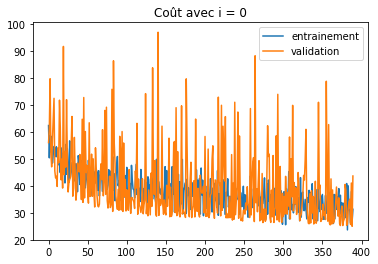

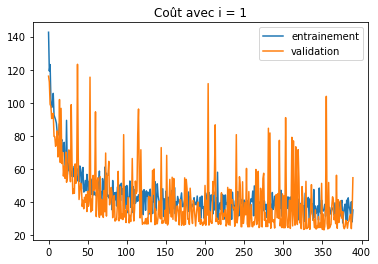

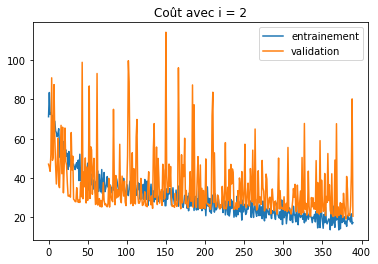

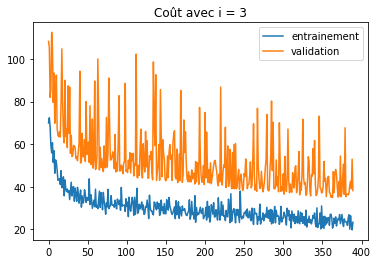

In [148]:

for i in [0, 1, 2, 3]:
    rezo = reseau()
    val_data, partial_train_data = split_data(train_data,i)
    val_targets, partial_train_targets = split_data(train_targets,i)
    histo = rezo.fit(partial_train_data, partial_train_targets, epochs = 400, batch_size = 32, validation_data = (val_data, val_targets), verbose = 0)
    histo_dict= histo.history
    

    loss_values = histo_dict['loss']
    val_loss_values = histo_dict['val_loss']

    fig = plt.figure()
    plt.plot(range(390),loss_values[10:], label = 'entrainement')
    plt.plot(range(390),val_loss_values[10:], label = 'validation')
    plt.title(f'Coût avec i = {i}')
    plt.legend()
    plt.show()
    


verbose = 0

Tracez la moyenne de la mae sur les 4 réseau en fonction du nombre d'epochs. Utilisez ce tracé pour optimiser votre réseau. Une fois que vous avez trouvé une configuration qui vous semble optimale, entraînez votre réseau sur la totalité des données et testez le.

*Indice : vous pouvez utiliser la fonction ci-dessous pour lisser votre tracé et obtenir un résultat plus lisible. Omettre les premiers points peut aussi aider*

In [145]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

# Exercice 3 : MNIST et covnet

Nous allons maintenant aborder un autre type de réseaux particulièrement adaptés pour approcher des données graphiques : les réseaux de convolution ou convnet (pour convolutional neural network). Ces réseaux permettent un apprentissage bien plus similaire à celui attendu dans les vidéos de ce matin.


**<font color=red>Attention : les temps de calculs étant plus importants, dans la suite nous n'utiliserons que les 6 000 premières images pour l'entraînement !</font>**

Construire un convnet contenant plusieurs couches de type `Conv2D` (au moins 2). Entre deux couches de types `Conv2D` ajouter une couche de type `MaxPooling2D((2,2))`. Après le réseau de convolution, pensez à ajouter une couche de type `Flatten` puis au moins une couche de type `Dense` avant la dernière couche (elle même de type `Dense`).

Pour les couches `Conv2D`, faites attention à ne pas faire des couches trop grande (Max 64 neurones). Choisissez la taille de la matrice de convolution entre (2,2) et (5,5).

Optimisez votre réseau sur MNIST en utilisant les données mises en forme ci-dessous. A ce stade, même en utilisant uniquement les 6 000 premières images, vous devriez obtenir une précision sur les données de validation presque aussi bonne que celle obtenue dans l'exercice 1.

**Pensez bien à tracer les historiques de la fonction de coût et de la précision pour suivre l'apprentissage de votre réseau !!!**

In [161]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
partial_train_images= train_images[:5000]
partial_train_labels= train_labels[:5000]

val_images = train_images[5000:6000]
val_labels = train_labels[5000:6000]

In [162]:
model = models.Sequential()
model.add(layers.Conv2D(48, (3,3), activation= 'swish', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation= 'swish', ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16, (3,3), activation= 'swish', ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'swish'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 48)        480       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 48)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        13856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 64)              

In [163]:
history = model.fit(partial_train_images, partial_train_labels, epochs = 10, batch_size = 124, validation_data = (val_images, val_labels))

Epoch 1/10
41/41 [==============================] - 76s 2s/step - loss: 1.7757 - accuracy: 0.4105 - val_loss: 0.6380 - val_accuracy: 0.8080
Epoch 2/10
41/41 [==============================] - 58s 1s/step - loss: 0.4962 - accuracy: 0.8498 - val_loss: 0.5353 - val_accuracy: 0.8520
Epoch 3/10
41/41 [==============================] - 90s 2s/step - loss: 0.3551 - accuracy: 0.8933 - val_loss: 0.3519 - val_accuracy: 0.8850
Epoch 4/10
41/41 [==============================] - 45s 1s/step - loss: 0.2739 - accuracy: 0.9209 - val_loss: 0.2503 - val_accuracy: 0.9210
Epoch 5/10
41/41 [==============================] - 2s 43ms/step - loss: 0.2121 - accuracy: 0.9313 - val_loss: 0.2611 - val_accuracy: 0.9170
Epoch 6/10
41/41 [==============================] - 2s 39ms/step - loss: 0.1672 - accuracy: 0.9532 - val_loss: 0.1970 - val_accuracy: 0.9500
Epoch 7/10
41/41 [==============================] - 1s 33ms/step - loss: 0.1410 - accuracy: 0.9532 - val_loss: 0.1988 - val_accuracy: 0.9380
Epoch 8/10
41/41 

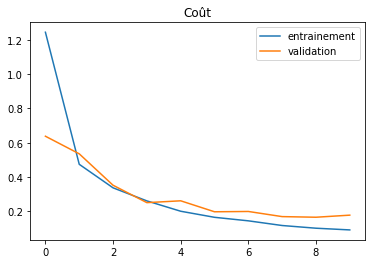

In [165]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure()
plt.plot(range(10),loss_values, label = 'entrainement')
plt.plot(range(10),val_loss_values, label = 'validation')
plt.title('Coût')
plt.legend()
plt.show()

In [166]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy : ', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1574 - accuracy: 0.9496
Test accuracy :  0.9495999813079834


Ajoutez une couche de type `Dropout` juste avant la dernière couche.

Jouez sur le taux de dropout et commentez son impact. Optimisez à nouveau votre réseau, puis entraînez votre réseau sur les 6 000 données d'entraînement et testez le. 

Comparez la précision atteinte avec un tel réseau avec celle atteinte lors du premier exercice (gardez en mémoire que vous entrainez votre réseau sur 5 fois moins de données que pour le premier exercice !). 

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

LA REPONSE ICI (double-clique pour editer la cellule)